## hierarchical clustering

In [511]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [512]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

In [513]:
# Ver las primeras filas
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Paso 1: Análisis Exploratorio de Datos (EDA)

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [515]:
# Ver filas y columnas de 'car data.csv'
print(f"El dataset 'Mall_Customers.csv' (df) tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset 'Mall_Customers.csv' (df) tiene 200 filas y 5 columnas.


In [516]:
print("Nombres de las columnas del dataset 'Mall_Customers.csv':")
print(df.columns.tolist())

Nombres de las columnas del dataset 'Mall_Customers.csv':
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [517]:
# Información general del dataset
print("Información general del dataset 'Mall_Customers.csv':")
df.info()

Información general del dataset 'Mall_Customers.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [518]:
# Comprobar valores nulos
print("Valores nulos por columna en 'Mall_Customers.csv':")
print(df.isnull().sum())

Valores nulos por columna en 'Mall_Customers.csv':
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [519]:
# Estadísticas descriptivas
print("Estadísticas básicas de las columnas numéricas en 'Mall_Customers.csv':")
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

Estadísticas básicas de las columnas numéricas en 'Mall_Customers.csv':


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


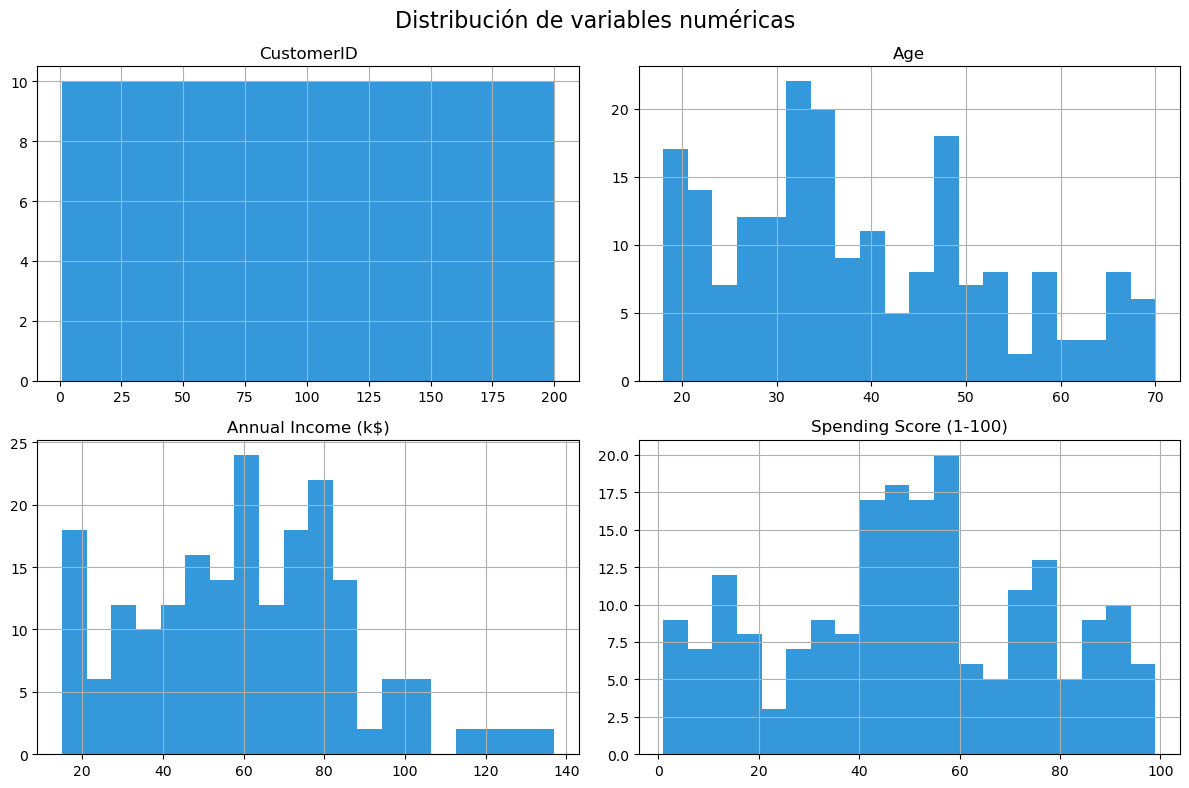

In [520]:
## Histogramas de las variables numéricas
df.hist(bins=20, figsize=(12, 8), color='#3498db')
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

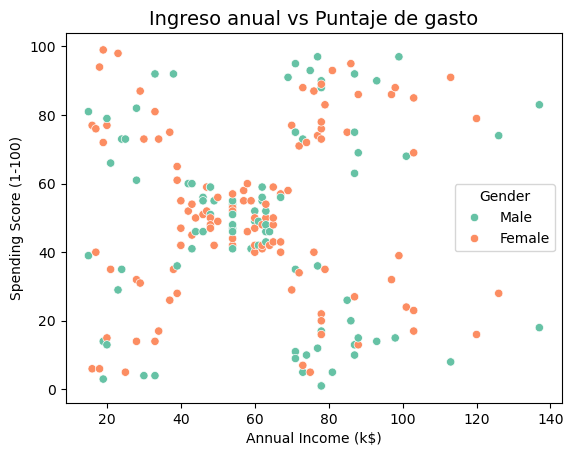

In [521]:
## Gráfico de dispersión: Ingreso vs. Puntaje de gasto (con color por género)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Ingreso anual vs Puntaje de gasto', fontsize=14)
plt.show()

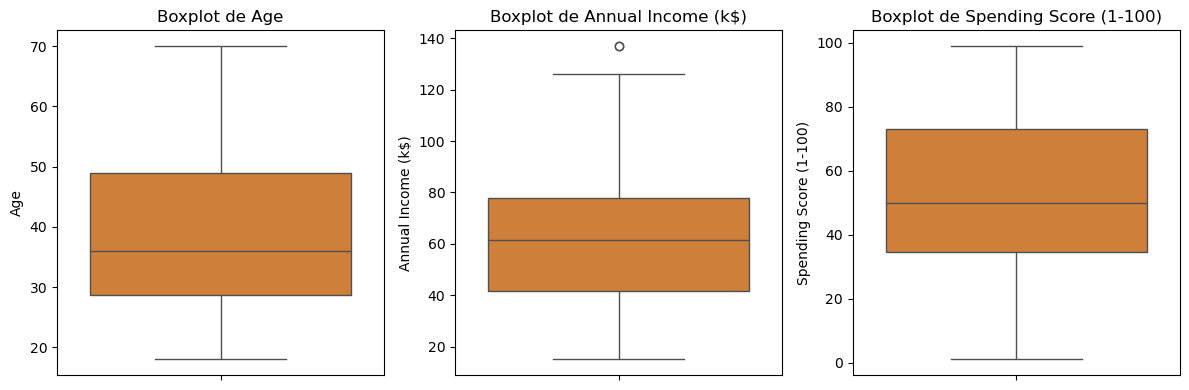

In [522]:
## Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=col, data=df, color='#e67e22')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## Paso 2: Procesamiento de los datos

In [524]:
# Eliminar columna CustomerID innecesaria
df.drop(columns=['CustomerID'], inplace=True, errors='ignore')

In [525]:
# Codificar la variable categórica Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [526]:
# Validar valores nulos
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [527]:
# Eliminar outliers usando el rango intercuartílico (IQR)
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Filtramos los valores dentro del rango típico
df = df[(df['Annual Income (k$)'] >= (Q1 - 1.5 * IQR)) & 
        (df['Annual Income (k$)'] <= (Q3 + 1.5 * IQR))]

## Paso 3: Seleccion de caracteristicas

In [529]:
# Selección de características más relevantes
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_selected = df[features]

In [530]:
# Estandarización de variables seleccionadas
scaler = StandardScaler()
df_scaled_selected = scaler.fit_transform(df_selected)

# Convertimos de nuevo a DataFrame
df_scaled_selected = pd.DataFrame(df_scaled_selected, columns=features)
print(df_scaled_selected.head())

    Age  Annual Income (k$)  Spending Score (1-100)
0 -1.43               -1.78                   -0.44
1 -1.28               -1.78                    1.20
2 -1.35               -1.74                   -1.72
3 -1.14               -1.74                    1.04
4 -0.57               -1.70                   -0.40


## Paso 4: Entrenamiento del modelo

In [532]:
# Entrenar el modelo con método 'ward'
linked = linkage(df_scaled_selected, method='ward')

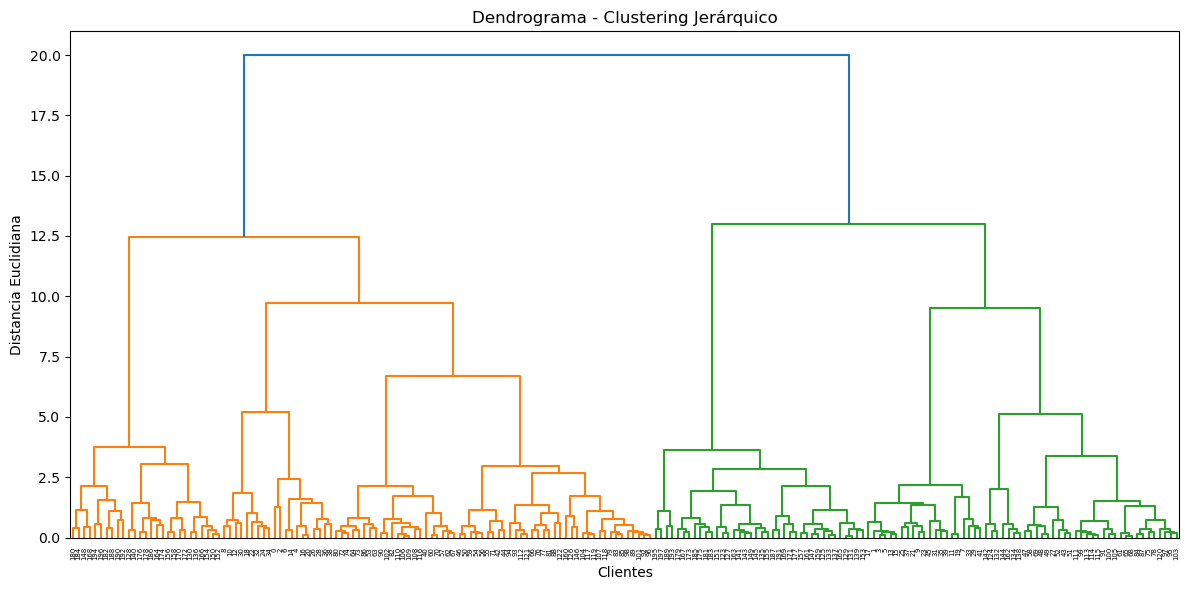

In [533]:
# Visualizar el dendrograma para identificar el número óptimo de clusters
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.tight_layout()
plt.show()

In [534]:
# Definir el número de clusters a 5
n_clusters = 5

In [535]:
# Crear y entrenar el modelo con 5 clusters
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hc_model.fit_predict(df_scaled_selected)

In [536]:
# Agregar los labels de cluster al DataFrame original (escalado)
df_clusters = df_selected.copy()
df_clusters['Cluster'] = cluster_labels

In [537]:
# Ver las primeras filas con sus clusters asignados
print(df_clusters.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        4
1   21                  15                      81        0
2   20                  16                       6        4
3   23                  16                      77        0
4   31                  17                      40        4


In [538]:
# Revisar cuántos clientes hay por cluster
print(df_clusters['Cluster'].value_counts())

Cluster
1    57
0    56
2    38
3    27
4    20
Name: count, dtype: int64


## Paso 5: Evaluar el desempeño del modelo

In [540]:
# Evaluar el coeficiente de Silhouette
silhouette_avg = silhouette_score(df_scaled_selected, cluster_labels)
print(f"Coeficiente de Silhouette: {silhouette_avg}")

Coeficiente de Silhouette: 0.4006897229885412


In [541]:
# Evaluar el Índice de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(df_scaled_selected, cluster_labels)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_avg}")

Índice de Calinski-Harabasz: 106.66234821726492


In [542]:
for k in range(2, 7):
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(df_scaled_selected)
    silhouette = silhouette_score(df_scaled_selected, labels)
    calinski = calinski_harabasz_score(df_scaled_selected, labels)
    print(f"{k} clusters")
    print(f"Silhouette: {silhouette:.3f}") 
    print(f"Calinski-Harabasz: {calinski:.2f}")

2 clusters
Silhouette: 0.320
Calinski-Harabasz: 99.22
3 clusters
Silhouette: 0.339
Calinski-Harabasz: 89.45
4 clusters
Silhouette: 0.369
Calinski-Harabasz: 100.77
5 clusters
Silhouette: 0.401
Calinski-Harabasz: 106.66
6 clusters
Silhouette: 0.426
Calinski-Harabasz: 124.89


## Modificar a 6 clusters

In [544]:
# Entrenar modelo final con 6 clusters
hc_final = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels_final = hc_final.fit_predict(df_scaled_selected)

In [545]:
# Añadir etiquetas al DataFrame original (sin afectar el anterior de 5 clusters)
df_selected['Cluster_6'] = labels_final

In [546]:
# Revisar cuántos clientes hay por cluster
print(df_selected['Cluster_6'].value_counts())

Cluster_6
0    57
2    38
4    35
3    27
5    21
1    20
Name: count, dtype: int64


## Paso 6: Graficas de visulización de resultados

In [548]:
# Visualización con PCA
pca = PCA(n_components=2)
pca_result_6 = pca.fit_transform(df_scaled_selected)

df_selected['PCA1_6'] = pca_result_6[:, 0]
df_selected['PCA2_6'] = pca_result_6[:, 1]

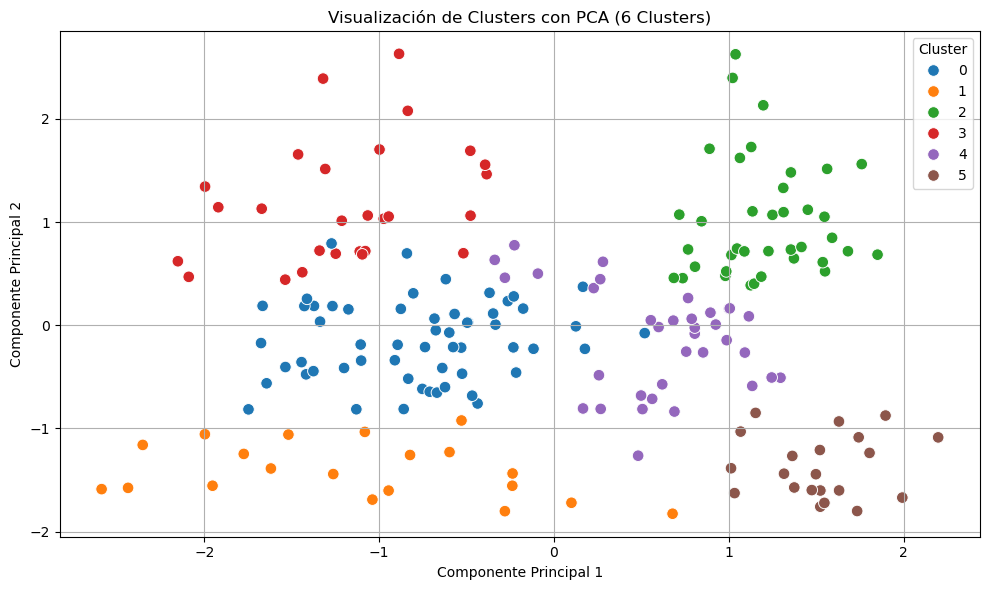

In [549]:
# Gráfica PCA para los 6 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='PCA1_6', y='PCA2_6', hue='Cluster_6', palette='tab10', s=70)
plt.title('Visualización de Clusters con PCA (6 Clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

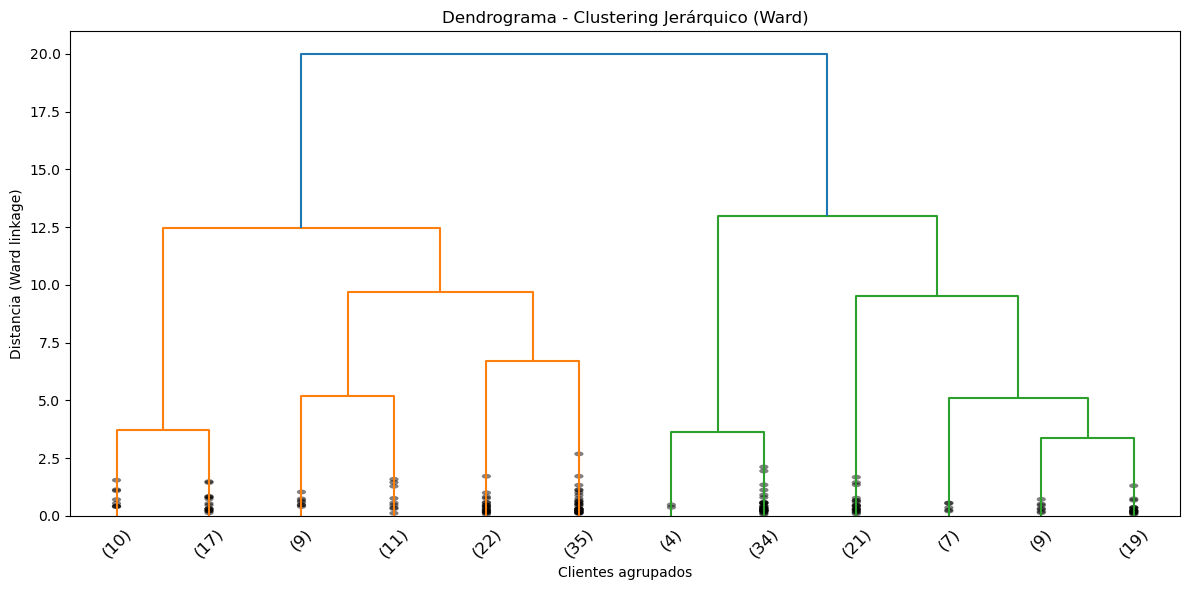

In [550]:
# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=12, 
           leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Dendrograma - Clustering Jerárquico (Ward)')
plt.xlabel('Clientes agrupados')
plt.ylabel('Distancia (Ward linkage)')
plt.tight_layout()
plt.show()

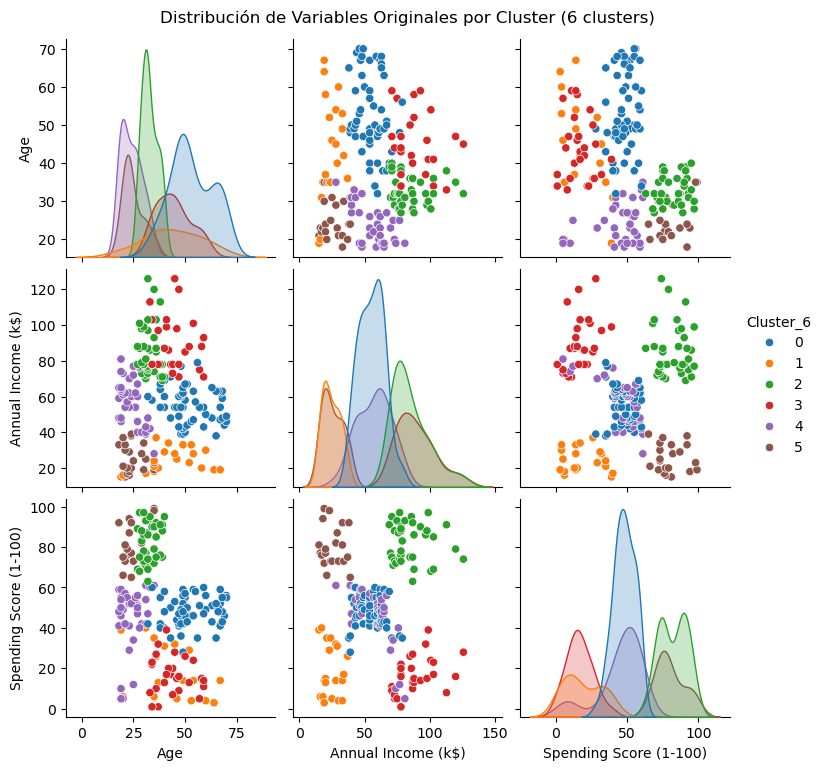

In [551]:
# Pairplot con los 6 clusters
sns.pairplot(df_selected, hue='Cluster_6', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='tab10')
plt.suptitle("Distribución de Variables Originales por Cluster (6 clusters)", y=1.02)
plt.show()

In [589]:
# Calcular el promedio de variables por cluster
cluster_profiles = df_selected.groupby('Cluster_6')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [591]:
# Etiquetas de las variables
labels = cluster_profiles.columns
num_vars = len(labels)

In [593]:
# Ángulos del gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

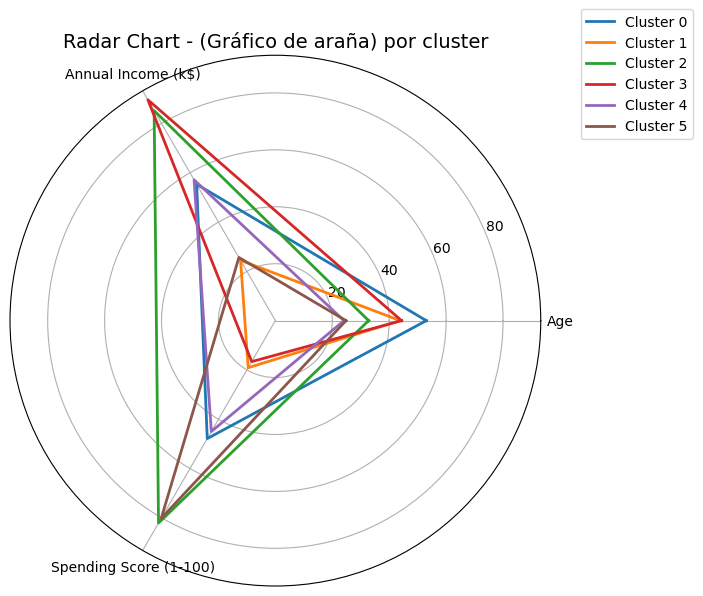

In [605]:
# Crear gráfico Radar Chart - (Gráfico de araña) por cluster
plt.figure(figsize=(8, 6))
for i in cluster_profiles.index:
    values = cluster_profiles.loc[i].tolist()
    values += values[:1]  # cerrar el círculo
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)

plt.xticks(angles[:-1], labels)
plt.title('Radar Chart - (Gráfico de araña) por cluster', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()